In [7]:
import pandas as pd
from google.colab import drive
import re
import numpy as np

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clean data

In [9]:
#Đọc file CSV
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/SIC/Data/new_retail_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
print(df)

        Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362

In [11]:
#Xem thông tin tổng quan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [12]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.016770e+05,301702.000000,3.016480e+05,301670.000000,301837.000000,301660.000000,301649.000000,301653.000000,301660.000000,301826.000000
mean,5.495823e+06,55006.553934,5.501464e+09,50298.951019,35.481326,2023.165113,5.359729,255.163659,1367.651156,3.162670
std,2.595565e+06,26005.675200,2.596017e+09,28972.807134,15.021933,0.371283,2.868575,141.389640,1128.998515,1.320827
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000219,10.003750,1.000000
25%,3.247930e+06,32469.250000,3.255061e+09,25425.000000,22.000000,2023.000000,3.000000,132.890764,438.724278,2.000000
50%,5.499657e+06,55012.000000,5.505812e+09,50602.500000,32.000000,2023.000000,5.000000,255.470969,1041.117547,3.000000
75%,7.739509e+06,77511.000000,7.749860e+09,75252.000000,46.000000,2023.000000,8.000000,377.672606,2029.999853,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.997911,4999.625796,5.000000


In [13]:
# Xóa những dòng có dữ liệu y hệt nhau, chỉ giữ lại 1 dòng
df = df.drop_duplicates()
print(df)

        Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362

In [14]:
# Xác định số cột dữ liệu tối thiểu phải có, Nếu thấp hơn sẽ xóa
hold = int(0.7 * df.shape[1])
df = df.dropna(thresh=hold)

In [15]:
#Chuẩn hóa tên cột
df.rename(columns={'products':'Products'}, inplace=True)

##Kiểm tra thông tin bộ dữ liệu

In [16]:
# trả về true nếu thuộc ASCII -> check ktu lạ
def strange_char(s):
    return bool(re.search(r'[^\x00-\x7F]', str(s)))

# ID không sạch (float, có dấu chấm) -> string
def is_not_clean_id(val):
    return isinstance(val, float) or (isinstance(val, str) and '.' in val)

# Tuổi không hợp lệ
def is_invalid_age(val):
    try:
        val = int(val)
        return val < 0 or val > 120
    except:
        return True

# Tổng lượt mua không phải số nguyên
def is_invalid_total_purchases(val):
    try:
        return not float(val).is_integer()
    except:
        return True

# Ngày không hợp lệ
def is_invalid_date(date_str):
    try:
        pd.to_datetime(date_str, errors='raise')  # raise lỗi nếu sai định dạng
        return False
    except:
        return True

def check_data_quality(df):
    report = {}

    # 1. Zipcode không đồng đều trong cùng quốc gia
    zip_check = df[['Country', 'Zipcode']].copy()
    zip_check['Zip_len'] = zip_check['Zipcode'].astype(str).apply(len)
    zip_len_issue = zip_check.groupby('Country')['Zip_len'].nunique()
    report['zip_len_issue'] = zip_len_issue[zip_len_issue > 0]

    # 2. Country viết không đồng nhất
    report['unique_countries'] = df['Country'].unique()

    # 3. Transaction_ID & Customer_ID sai định dạng
    report['transaction_id_issue'] = df[df['Transaction_ID'].apply(is_not_clean_id)][['Transaction_ID']]
    report['customer_id_issue'] = df[df['Customer_ID'].apply(is_not_clean_id)][['Customer_ID']]

    # 4. Phone & Zipcode không phải chuỗi
    report['phone_not_string'] = df[~df['Phone'].apply(lambda x: isinstance(x, str))][['Phone']]
    report['zipcode_not_string'] = df[~df['Zipcode'].apply(lambda x: isinstance(x, str))][['Zipcode']]

    # 5. Age không hợp lệ
    report['invalid_age'] = df[df['Age'].apply(is_invalid_age)][['Age']]

    # 6. City mã hóa sai
    report['city_encoding_issue'] = df[df['City'].apply(strange_char)][['City']]

    # 7. Total_Purchases sai định dạng
    report['total_purchase_issue'] = df[df['Total_Purchases'].apply(is_invalid_total_purchases)][['Total_Purchases']]

    # 8. Amount & Total_Amount âm
    report['amount_negative'] = df[df['Amount'] < 0][['Amount']]
    report['total_amount_negative'] = df[df['Total_Amount'] < 0][['Total_Amount']]

    # 9. Text fields không phải string
    text_fields = ['Name', 'Address', 'City', 'Country']
    text_type_issues = {}
    for col in text_fields:
        text_type_issues[col] = df[~df[col].apply(lambda x: isinstance(x, str))][[col]]
    report['text_type_issues'] = text_type_issues

    # 10. Kiểm tra Year, Month, Date
    if 'Year' in df.columns:
        report['year_type_issue'] = df[~df['Year'].apply(lambda x: isinstance(x, (int, np.integer)))][['Year']]
    if 'Month' in df.columns:
        report['month_type_issue'] = df[~df['Month'].apply(lambda x: isinstance(x, str))][['Month']]
   # if 'Date' in df.columns:
        #report['date_type_issue'] = df[df['Date'].apply(is_invalid_date)][['Date']]

    return report

In [17]:
# Gọi hàm kiểm tra
report = check_data_quality(df)

# Xem lỗi cụ thể
for key, value in report.items():
    print(f"\n--- {key} ---")
    if isinstance(value, dict):
        for subkey, subvalue in value.items():
            print(f"\n{subkey}:\n", subvalue)
    else:
        print(value)


--- zip_len_issue ---
Country
Australia    4
Canada       4
Germany      4
UK           4
USA          4
Name: Zip_len, dtype: int64

--- unique_countries ---
['Germany' 'UK' 'Australia' 'Canada' 'USA' nan]

--- transaction_id_issue ---
        Transaction_ID
0            8691788.0
1            2174773.0
2            6679610.0
3            7232460.0
4            4983775.0
...                ...
302005       4246475.0
302006       1197603.0
302007       7743242.0
302008       9301950.0
302009       2882826.0

[302006 rows x 1 columns]

--- customer_id_issue ---
        Customer_ID
0           37249.0
1           69749.0
2           30192.0
3           62101.0
4           27901.0
...             ...
302005      12104.0
302006      69772.0
302007      28449.0
302008      45477.0
302009      53626.0

[302006 rows x 1 columns]

--- phone_not_string ---
               Phone
0       1.414787e+09
1       6.852900e+09
2       8.362160e+09
3       2.776752e+09
4       9.098268e+09
...          

## Kết quả báo cáo
1. Chiều dài ZipCode không đồng nhất
  - Australia, Canada, Germany, UK, USA → mỗi quốc gia có 2 độ dài mã vùng khác nhau.
2. Tên quốc gia vẫn còn nan
3. Không đúng DataType ở ID dạng float :
 - Đây là dữ liệu rời rạc -> Int
4. Phone và ZipCode là float
  - Đây là dữ liệu rời rạc -> Int
5. Tuổi còn nan
6. Thành phố còn nan
7. Total_Purchases, Amount, Total_Amount ko có giá trị âm -> `pass`
8. Name, Address, City, Country đều có kiểu dữ liệu phù hợp (object/string) `pass`.
9. Năm (Year) sai kiểu float
10. Tháng (Month) kiểu Object
11. Ngày (Date) sai kiểu


##Tiến hành làm sạch dữ liệu

- Ta nhận thấy cột 'Zip code' không đồng nhất và cũng không có ý nghĩa phân tích nên sẽ bỏ bột Zip code

In [18]:
#Bỏ cột Zip code
df = df.drop(columns=['Zipcode'])


In [19]:
print(df)

        Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362

In [20]:
# Điền giá trị các cột số còn thiếu bằng Median(Trung vị)
cols = ['Age','Amount','Total_Purchases','Year']
for col in cols:
    df[col] = df[col].fillna(df[col].median())

In [21]:
# Tính Total_Amount khi Total_Purchases và Amount đều không NaN
df['Total_Amount'] = df.apply(
    lambda row: row['Total_Purchases'] * row['Amount']
    if pd.notnull(row['Total_Purchases']) and pd.notnull(row['Amount']) else None, axis=1
)

- Ta nhận thấy cột Ratings và Feedback có mối tương quan lẫn nhau nên ta có thể điền một cột dựa vào cột còn lại

In [22]:
#Kiểm tra cột Feedback và Ratings
print(pd.unique(df['Feedback']))
print(pd.unique(df['Ratings']))

['Excellent' 'Average' 'Bad' 'Good' nan]
[ 5.  4.  2.  1.  3. nan]


In [23]:
feedback_to_rating = {
    "Excellent": 5,
    "Good": 4,
    "Average": 3,
    "Bad": 2  # Có thể chọn 2 hoặc 1 tuỳ dataset, thường chọn 2.
}
rating_to_feedback = {
    5: "Excellent",
    4: "Good",
    3: "Average",
    2: "Bad",
    1: "Bad"
}
# Điền Ratings dựa vào Feedback
mask1 = df['Ratings'].isna() & df['Feedback'].notna()
df.loc[mask1, 'Ratings'] = df.loc[mask1, 'Feedback'].map(feedback_to_rating)

# Điền Feedback dựa vào Ratings
mask2 = df['Feedback'].isna() & df['Ratings'].notna()
df.loc[mask2, 'Feedback'] = df.loc[mask2, 'Ratings'].map(rating_to_feedback)

In [24]:
# Số lượng dòng na ở cả 2 cột
na = df[df['Ratings'].isna() & df['Feedback'].isna()].shape[0]

#Số lượng dòng tổng df
all = df.shape[0]

print(na/all)

0.000609259418687046


- Đây là tỉ lệ rất thấp nên ta có thể xử lí bằng cách bỏ các dòng này

In [25]:
# Bỏ dòng na
df = df[~(df['Feedback'].isna() & df['Ratings'].isna())]

- Tương tự cột City và Country cũng có mối tương quan

In [26]:
print(pd.unique(df['City']))
print(pd.unique(df['Country']))
print(pd.unique(df['State']))

['Dortmund' 'Nottingham' 'Geelong' 'Edmonton' 'Bristol' 'Brisbane'
 'Kitchener' 'Munich' 'Wollongong' 'Cologne' 'Portsmouth' 'San Jose'
 'Hamilton' 'Manchester' 'Cardiff' 'Glasgow' 'Hull' 'Cleveland'
 'Southampton' 'Leipzig' 'Cairns' 'London' 'Bielefeld' 'Düsseldorf'
 'Philadelphia' 'Halifax' 'Montreal' 'Mackay' 'Quebec City' 'Barrie'
 'Adelaide' 'Leeds' 'Plymouth' 'Perth' 'Sheffield' 'Frankfurt' 'Toronto'
 'Essen' 'Kelowna' 'Birmingham' 'Ottawa' 'Liverpool' "St. John's" 'Hobart'
 'Atlanta' 'New Orleans' 'Wichita' 'Albury-Wodonga' 'Winnipeg' 'Vancouver'
 'Hamburg' 'Windsor' 'Calgary' 'Newcastle upon Tyne' 'Townsville' 'Oshawa'
 'Houston' 'Berlin' 'Seattle' 'Charlotte' 'New York' 'Milwaukee'
 'Edinburgh' 'Launceston' 'Bochum' 'Münster' 'Bonn' 'Columbus' 'Melbourne'
 'Leicester' 'Fort Worth' 'Toowoomba' 'Victoria' 'Oxford' 'Canberra'
 'Saskatoon' 'Memphis' 'Regina' 'Hanover' 'Long Beach' 'San Francisco'
 'Nuremberg' 'Minneapolis' 'Colorado Springs' 'Duisburg' 'Denver'
 'Bendigo' 'Bremen'

In [27]:
# Tên thành phố của một quốc gia
country_to_cities = {
    "Germany": [
        "Dortmund", "Munich", "Cologne", "Leipzig", "Bielefeld", "Düsseldorf", "Frankfurt", "Essen",
        "Hamburg", "Berlin", "Bochum", "Münster", "Bonn", "Nuremberg", "Stuttgart", "Hanover",
        "Duisburg", "Bremen", "Dresden", "Wuppertal"
    ],
    "UK": [
        "Nottingham", "Bristol", "Portsmouth", "Manchester", "Cardiff", "Glasgow", "Hull", "Southampton",
        "London", "Leeds", "Plymouth", "Sheffield", "Birmingham", "Liverpool", "Newcastle upon Tyne",
        "Leicester", "Oxford", "Brighton", "Edinburgh", "Belfast"
    ],
    "Australia": [
        "Geelong", "Brisbane", "Wollongong", "Cairns", "Mackay", "Adelaide", "Perth", "Hobart",
        "Albury-Wodonga", "Townsville", "Toowoomba", "Victoria", "Canberra", "Melbourne", "Sydney",
        "Darwin", "Gold Coast", "Ballarat", "Bendigo", "Launceston"
    ],
    "Canada": [
        "Edmonton", "Kitchener", "Hamilton", "Halifax", "Montreal", "Quebec City", "Barrie",
        "Toronto", "Kelowna", "Ottawa", "St. Johns", "Winnipeg", "Vancouver", "Windsor", "Calgary",
        "Oshawa", "Saskatoon", "Regina"
    ],
    "USA": [
        "San Jose", "Philadelphia", "Cleveland", "Atlanta", "New Orleans", "Wichita", "Houston",
        "Seattle", "Charlotte", "New York", "Milwaukee", "Columbus", "Fort Worth", "Memphis",
        "Long Beach", "San Francisco", "Minneapolis", "Colorado Springs", "Denver", "Boston",
        "Tucson", "Tulsa", "Portland", "Kansas City", "Nashville", "Baltimore", "Virginia Beach",
        "Arlington", "Louisville", "Mesa", "Las Vegas", "Dallas", "Washington", "Miami", "Newcastle",
        "San Antonio", "Fresno", "Phoenix", "Austin", "Chicago", "Jacksonville", "Omaha",
        "Oklahoma City", "San Diego", "Sacramento", "Raleigh", "Oakland", "Indianapolis", "Detroit",
        "Los Angeles", "El Paso", "Albuquerque"
    ]
}
# Chuyển thành dạng 'city':'country'
city_to_country = {}
for country, cities in country_to_cities.items():
    for city in cities:
        city_to_country[city] = country
# Nếu cả 2 không na thì gán giá trị vào
mask = df['Country'].isna() & df['City'].notna()
df.loc[mask, 'Country'] = df.loc[mask, 'City'].map(city_to_country)
print(df)

        Transaction_ID  Customer_ID                 Name  \
0            8691788.0      37249.0  Michelle Harrington   
1            2174773.0      69749.0          Kelsey Hill   
2            6679610.0      30192.0         Scott Jensen   
3            7232460.0      62101.0        Joseph Miller   
4            4983775.0      27901.0        Debra Coleman   
...                ...          ...                  ...   
302005       4246475.0      12104.0         Meagan Ellis   
302006       1197603.0      69772.0          Mathew Beck   
302007       7743242.0      28449.0           Daniel Lee   
302008       9301950.0      45477.0       Patrick Wilson   
302009       2882826.0      53626.0       Dustin Merritt   

                           Email         Phone                       Address  \
0              Ebony39@gmail.com  1.414787e+09             3959 Amanda Burgs   
1               Mark36@gmail.com  6.852900e+09            82072 Dawn Centers   
2              Shane85@gmail.com  8.362

- Kiểm tra số lượng cả 2 na

In [28]:
# Đếm số dòng có City bị thiếu
print(df['City'].isna().sum())

# Đếm số dòng có Country bị thiếu
print(df['Country'].isna().sum())

# Đếm số dòng đồng thời thiếu cả City và Country
print((df['City'].isna() & df['Country'].isna()).sum())


248
0
0


In [29]:
#Thực hiện gán nhãn cho các dòng na ở cột City
df['City'] = df['City'].fillna('Unknown')

- Kiểm tra xem còn các cột nào chưa xử lí

In [30]:
# Danh sách các cột bỏ qua
excluded_cols = ['Transaction_ID', 'Customer_ID', 'Name', 'Phone', 'Address',
                 'Zipcode', 'Age', 'Date', 'Amount', 'Total_Amount', 'Products','Email']

# Lọc các cột còn lại
columns_to_check = [col for col in df.columns if col not in excluded_cols]

# In giá trị duy nhất của từng cột còn lại
for col in columns_to_check:
    print(f"\n>>> {col} ({df[col].nunique()} unique values):")
    print(df[col].unique())


>>> City (131 unique values):
['Dortmund' 'Nottingham' 'Geelong' 'Edmonton' 'Bristol' 'Brisbane'
 'Kitchener' 'Munich' 'Wollongong' 'Cologne' 'Portsmouth' 'San Jose'
 'Hamilton' 'Manchester' 'Cardiff' 'Glasgow' 'Hull' 'Cleveland'
 'Southampton' 'Leipzig' 'Cairns' 'London' 'Bielefeld' 'Düsseldorf'
 'Philadelphia' 'Halifax' 'Montreal' 'Mackay' 'Quebec City' 'Barrie'
 'Adelaide' 'Leeds' 'Plymouth' 'Perth' 'Sheffield' 'Frankfurt' 'Toronto'
 'Essen' 'Kelowna' 'Birmingham' 'Ottawa' 'Liverpool' "St. John's" 'Hobart'
 'Atlanta' 'New Orleans' 'Wichita' 'Albury-Wodonga' 'Winnipeg' 'Vancouver'
 'Hamburg' 'Windsor' 'Calgary' 'Newcastle upon Tyne' 'Townsville' 'Oshawa'
 'Houston' 'Berlin' 'Seattle' 'Charlotte' 'New York' 'Milwaukee'
 'Edinburgh' 'Launceston' 'Bochum' 'Münster' 'Bonn' 'Columbus' 'Melbourne'
 'Leicester' 'Fort Worth' 'Toowoomba' 'Victoria' 'Oxford' 'Canberra'
 'Saskatoon' 'Memphis' 'Regina' 'Hanover' 'Long Beach' 'San Francisco'
 'Nuremberg' 'Minneapolis' 'Colorado Springs' 'Duisbur

In [31]:
# Chỉnh sửa dữ liệu ngày, từ mm/dd/yy thành dd/mm/yy
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y', errors='coerce')
#Chuyển na Month dựa vào Date
mask = df['Month'].isna() & df['Date'].notna()
df.loc[mask, 'Month'] = df.loc[mask, 'Date'].dt.month_name()
df = df.dropna(subset=['Month'])

In [32]:
# Xử lí na các cột còn lại
df['Income'] = df['Income'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')
df['Date'] = df['Date'].fillna('Unknown')
df['Time'] = df['Time'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')
df['Customer_Segment'] = df['Customer_Segment'].fillna('Unknown')
df['Shipping_Method'] = df['Shipping_Method'].fillna('Unknown')
df['Payment_Method'] = df['Payment_Method'].fillna('Unknown')
df['Order_Status'] = df['Order_Status'].fillna('Unknown')
df['Product_Category'] = df['Product_Category'].fillna('Unknown')
df['Product_Brand'] = df['Product_Brand'].fillna('Unknown')

/tmp/ipython-input-2215436911.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Income'] = df['Income'].fillna('Unknown')


In [33]:
df.isna().sum()

,0
Transaction_ID,333
Customer_ID,308
Name,382
Email,346
Phone,362
Address,315
City,0
State,0
Country,0
Age,0


=> Tạm thời cleaned

In [34]:
df_cleaned = df.copy()

# Khám phá dữ liệu

In [35]:
 #!pip install gender-guesser
 #!pip install seaborn
!pip install squarify

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from datetime import datetime

# Thiết lập giao diện đồ thị
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

## Phân tích thống kê các biến định lượng

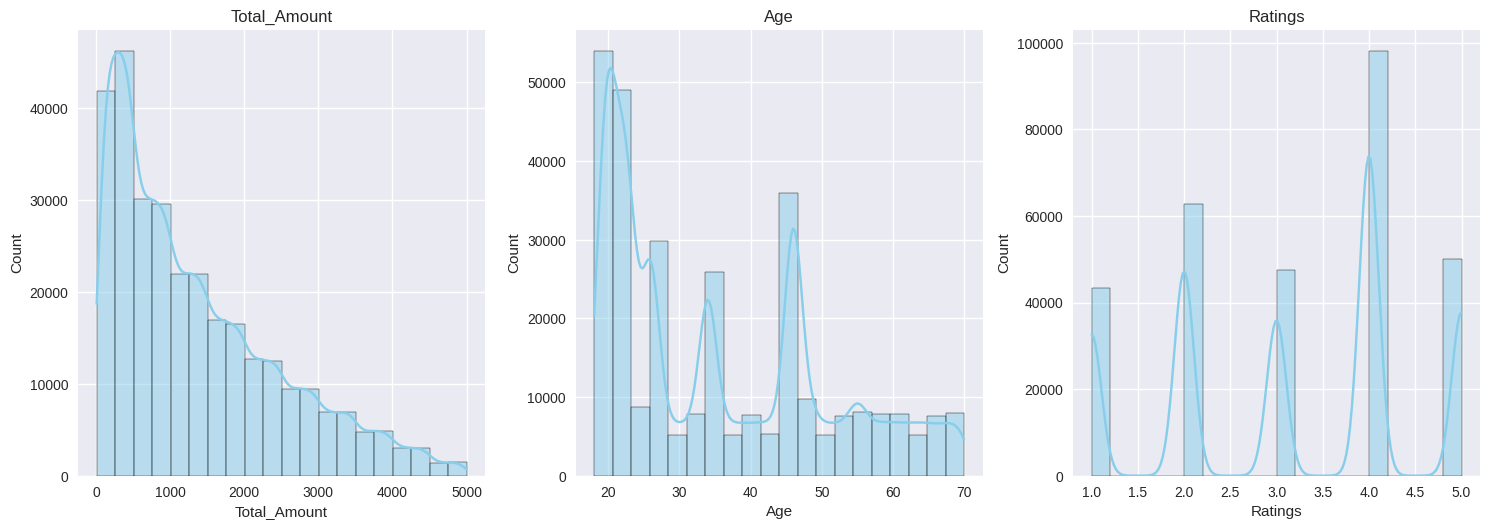

In [37]:
def quantitative_stats_visualization(dataframe, numerical_cols):

    plt.figure(figsize=(15, 10))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(2, 3, i)
        sns.histplot(data=dataframe, x=col, kde=True, bins=20, color='skyblue')
        plt.title(f'{col}', fontsize=12)
        plt.xlabel(col)
        #plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Áp dụng cho các biến định lượng
quant_cols = ['Total_Amount', 'Age', 'Ratings']
quantitative_stats_visualization(df, quant_cols)

**1.** **Chi tiêu khách hàng(Total_Amount)**: Dữ liệu phản ánh một thực tế phổ biến trong ngành bán lẻ đa số khách hàng có xu hướng thực hiện các giao dịch có giá trị nhỏ, trong khi chỉ một nhóm nhỏ đóng góp giá trị lớn cho doanh thu.
Chiến lược phát triển:
*   Với nhóm chi tiêu thấp: Triển khai các chương trình "mua thêm để được ưu đãi" hoặc gói combo sản phẩm để tăng giá trị đơn hàng trung bình
*   Với nhóm chi tiêu cao: Xây dựng chương trình khách hàng thân thiết với các đặc quyền độc tôn như tư vấn cá nhân, giao hàng ưu tiên, hoặc sự kiện riêng

**2**. **Phân khúc độ tuổi khách hàng(Age):**
Hai nhóm tuổi nổi bật 18-25 và 45-50 phản ánh hai giai đoạn tiêu dùng quan trọng: thế hệ Gen Z bắt đầu có thu nhập ổn định và thế hệ X đang ở đỉnh cao sự nghiệp. Sự tập trung tại các mốc tuổi tròn có thể xuất phát từ đặc điểm tâm lý người tiêu dùng - họ thường có xu hướng đăng ký và mua sắm nhiều hơn vào các cột mốc tuổi đặc biệt như 30, 40, 50.
Chiến lược tiếp cận mục tiêu:
*   Nhóm 18-25: Tập trung vào mạng xã hội, nội dung thú vị, giá cả hợp lý và xu hướng
*   Nhóm 45-50: Ưu tiên chất lượng, tiện lợi, dịch vụ chuyên nghiệp và giá trị lâu dài

**3. Thang đo hài lòng khách hàng (Ratings)**:
Mức điểm đánh giá tập trung ở 4.0 cho thấy khách hàng nhìn chung cảm thấy hài lòng, nhưng chưa thực sự ấn tượng với trải nghiệm. Điều đáng lo ngại hơn là sự hiện diện của một lượng đánh giá 1.0-2.0 vẫn ở mức đáng quan ngại. Việc xác định và khắc phục những điểm yếu gây ra các đánh giá tiêu cực này là ưu tiên hàng đầu, nhằm duy trì tăng trưởng doanh thu bền vững.
*   Thực hiện khảo sát chi tiết với nhóm đánh giá 1-2 điểm để xác định vấn đề cụ thể
*   Phát triển quy trình phản hồi nhanh cho khiếu nại và đề xuất của khách hàng





## Phân tích thống kê các biến định tính

In [38]:
def categorical_stats_visualization(dataframe, categorical_cols):
    stats_list = []

    for col in categorical_cols:
        stats = dataframe[col].value_counts().reset_index()
        stats.columns = [col, 'Count']
        stats['Percentage'] = (stats['Count'] / len(dataframe)) * 100
        stats_list.append(stats)

        print(f"\n{col} Distribution:")
        display(stats.style.format({"Percentage": "{:.2f}%"}).bar(subset=['Percentage'], color='lightblue'))
        # Áp dụng cho các biến phân loại
cat_cols = ['Country', 'City', 'Product_Category', 'Gender', 'Income', 'Customer_Segment', 'Shipping_Method', 'Payment_Method']
categorical_stats_visualization(df, cat_cols)


Country Distribution:


,Country,Count,Percentage
0,USA,95204,31.54%
1,UK,63085,20.90%
2,Germany,52849,17.51%
3,Australia,45354,15.03%
4,Canada,45329,15.02%



City Distribution:


,City,Count,Percentage
0,Chicago,21644,7.17%
1,Portsmouth,20109,6.66%
2,San Francisco,12178,4.03%
3,Frankfurt,10171,3.37%
4,Boston,9403,3.12%
5,New York,5451,1.81%
6,Fort Worth,5201,1.72%
7,London,4479,1.48%
8,Winnipeg,2404,0.80%
9,Birmingham,2381,0.79%



Product_Category Distribution:


,Product_Category,Count,Percentage
0,Electronics,71152,23.57%
1,Grocery,66753,22.12%
2,Clothing,54704,18.12%
3,Books,54586,18.09%
4,Home Decor,54343,18.01%
5,Unknown,283,0.09%



Gender Distribution:


,Gender,Count,Percentage
0,Male,187470,62.11%
1,Female,114034,37.78%
2,Unknown,317,0.11%



Income Distribution:


,Income,Count,Percentage
0,Medium,130138,43.12%
1,Low,96214,31.88%
2,High,75179,24.91%
3,Unknown,290,0.10%



Customer_Segment Distribution:


,Customer_Segment,Count,Percentage
0,Regular,146101,48.41%
1,New,91142,30.20%
2,Premium,64363,21.32%
3,Unknown,215,0.07%



Shipping_Method Distribution:


,Shipping_Method,Count,Percentage
0,Same-Day,104088,34.49%
1,Express,102298,33.89%
2,Standard,95098,31.51%
3,Unknown,337,0.11%



Payment_Method Distribution:


,Payment_Method,Count,Percentage
0,Credit Card,90065,29.84%
1,Debit Card,76739,25.43%
2,Cash,73761,24.44%
3,PayPal,60959,20.20%
4,Unknown,297,0.10%


- Phân bố thị trường địa lý hiện diện mạnh mẽ tại các thị trường các nước phát triển với Mỹ dẫn đầu, tiếp theo là Anh, Đức, Úc và Canada. Điều đáng chú ý là khách hàng không chỉ tập trung ở các đô thị lớn mà phân bố đều khắp nhiều khu vực, với Chicago và Portsmouth nổi bật về lượng giao dịch cao.

- Điện tử và Hàng tạp hóa là hai nhóm sản phẩm chiếm ưu thế, tiếp theo là Quần áo, Sách và Trang trí nhà với tỷ lệ tương đối đều nhau. Về giới tính, khách hàng nam chiếm tỷ lệ áp đảo với hơn 60% so với nữ giới, cho thấy tiềm năng mở rộng đáng kể nếu có chiến lược tiếp cận phù hợp với khách hàng nữ.

- Nhóm thu nhập trung bình chiếm đa số so với nhóm thu nhập thấp và cao. Về độ trung thành, khách hàng thường xuyên chiếm khoảng một nửa tổng số, phản ánh khả năng giữ chân tốt của doanh nghiệp. Tuy nhiên, tỷ lệ khách hàng mới khá cao cũng mở ra cơ hội để tăng độ trung thành thông qua các chương trình chăm sóc phù hợp.
- Xu hướng tiêu dùng và thanh toán khách hàng thể hiện sự ưu tiên rõ ràng đối với tốc độ giao hàng. Về thanh toán, thẻ tín dụng dẫn đầu, tiếp theo là thẻ ghi nợ, tiền mặt và PayPal, cho thấy sự đa dạng trong thói quen thanh toán của khách hàng.

- Nên tập trung vào việc mở rộng thị trường nữ giới thông qua việc điều chỉnh danh mục sản phẩm và chiến dịch marketing phù hợp. Đồng thời, cần duy trì các chương trình ưu đãi cho khách hàng thường xuyên và cải thiện trải nghiệm dịch vụ để chuyển đổi khách mới thành khách quen.

- Việc đa dạng hóa phương thức thanh toán, đặc biệt bổ sung các tùy chọn hiện đại như ví điện tử, sẽ tăng tính linh hoạt và thuận tiện cho khách hàng. Bên cạnh đó, cần tiếp tục duy trì ưu thế về tốc độ giao hàng để đáp ứng nhu cầu ngày càng cao của thị trường.

## Xu hướng doanh thu theo thời gian

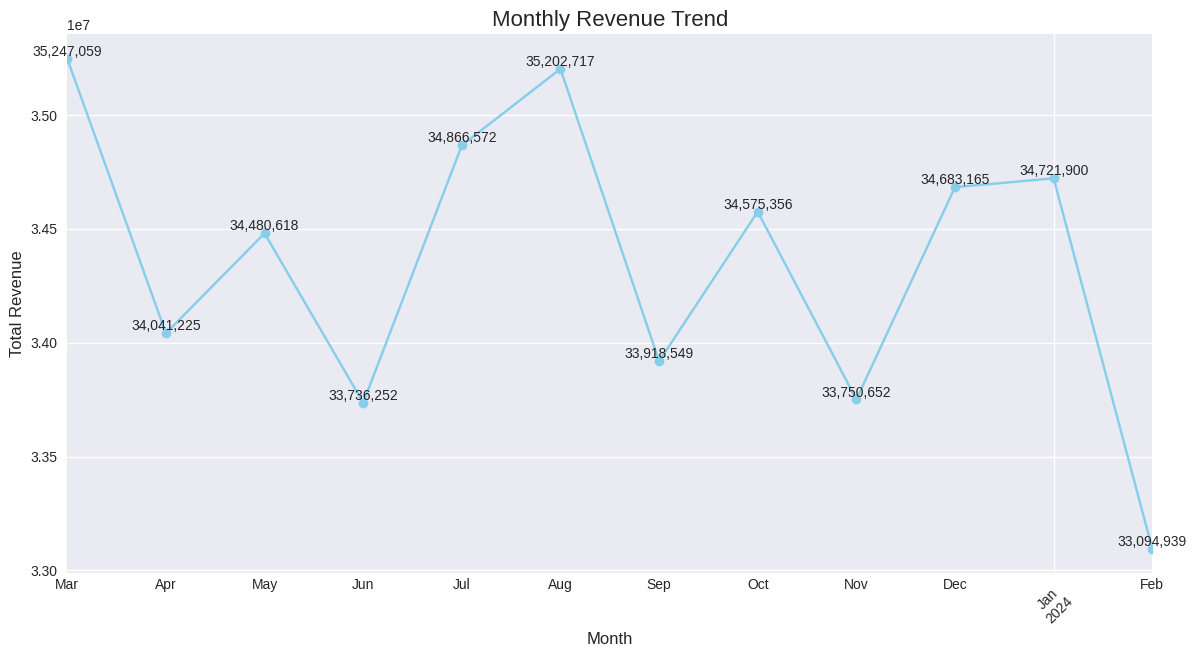

In [39]:
# Phân tích doanh thu theo tháng
plt.figure(figsize=(14, 7))

# Chuyển cột 'Date' sang định dạng datetime, bỏ qua các giá trị 'Unknown'
df_filtered = df[df['Date'] != 'Unknown'].copy()
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

# Tạo dataframe doanh thu theo tháng
monthly_revenue = df_filtered.resample('ME', on='Date')['Total_Amount'].sum()

ax = monthly_revenue.plot(marker='o', linestyle='-', color='skyblue')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.grid(True)

for x, y in zip(monthly_revenue.index, monthly_revenue.values):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

* Doanh thu năm 2024 thể hiện mô hình biến động chu kỳ với hai đỉnh cao nổi bật vào tháng 3 (35.23 triệu) và tháng 8 (35.20 triệu). Các tháng còn lại duy trì ổn định trong khoảng 34-34.7 triệu, ngoại trừ ba thời điểm trũng là tháng 2, 6 và 11.

- Những điểm bất thường đáng chú ý tháng 3 ghi nhận doanh thu cao nhất trong năm, đây là hiện tượng bất thường so với quy luật kinh doanh truyền thống khi đỉnh cao thường xuất hiện vào giữa hoặc cuối năm. Điều này cho thấy có thể đã xuất hiện những yếu tố đặc biệt tác động tích cực lên hoạt động kinh doanh trong giai đoạn này.

- Một điểm đáng lưu ý khác là sự sụt giảm mạnh gần 1.3 triệu từ tháng 8 sang tháng 9, phản ánh hiện tượng "hụt hơi" sau đợt cao điểm. Tương tự, sau xu hướng phục hồi cuối năm 2023, doanh thu lại giảm sâu vào tháng 2/2024, cho thấy sự thiếu liên tục trong động lực tăng trưởng.

- Phân tích theo từng giai đoạn cho thấy sự biến động đáng chú ý giữa các quý.

- Quý I ghi nhận sự bứt phá ấn tượng vào tháng 3, vượt kỳ vọng và trở thành tháng có doanh thu cao nhất trong năm. Sang quý II, doanh thu có nhiều biến động, đặc biệt là sự sụt giảm rõ rệt từ tháng 5 sang tháng 6.

- Quý III tiếp tục duy trì xu hướng tăng trưởng theo "quy luật mùa vụ", với tháng 8 đạt mức doanh thu cao, phù hợp với các chu kỳ tiêu dùng thường thấy. Trong khi đó, quý IV tương đối ổn định, nhưng không giữ được đà tăng trưởng khi bước sang đầu năm tiếp theo.

- Khuyến nghị chiến lược ưu tiên hàng đầu là phân tích sâu các yếu tố thúc đẩy thành công của tháng 3 để có thể tái tạo mô hình này cho các tháng khác. Đồng thời, cần xây dựng các chương trình hỗ trợ đặc biệt cho những tháng yếu như tháng 2, 6 và 11 thông qua khuyến mãi, tăng cường quảng bá hoặc ưu đãi mua sớm.

## Sản phẩm bán chạy

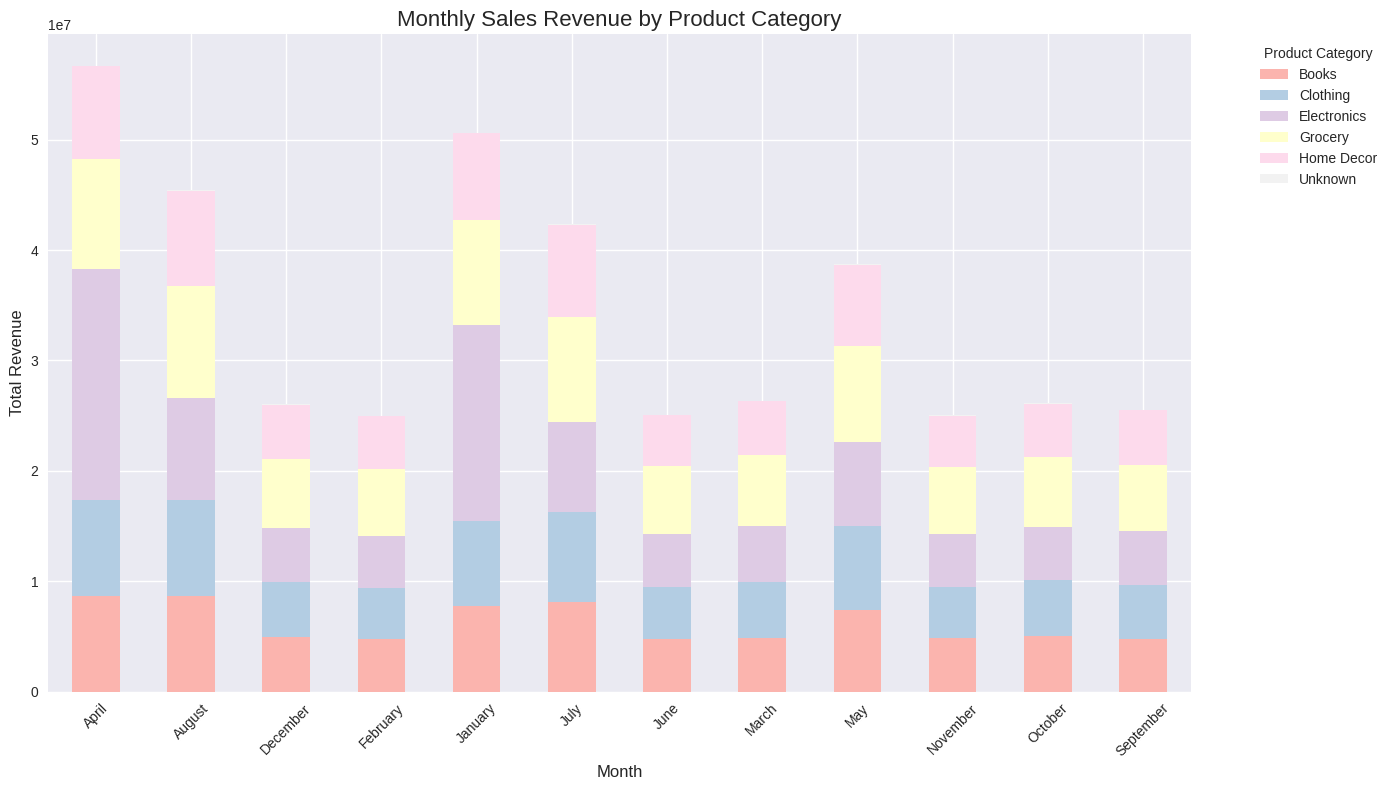

In [40]:
# Danh mục sản phẩm bán theo tháng
plt.figure(figsize=(14, 8))
top_products = df.groupby(['Month', 'Product_Category'])['Total_Amount'].sum().unstack()

# Vẽ đồ thị
top_products.plot(kind='bar', stacked=True, ax=plt.gca(), cmap='Pastel1')
plt.title('Monthly Sales Revenue by Product Category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-461571765.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_products.values, y=top10_products.index, palette='Pastel1')


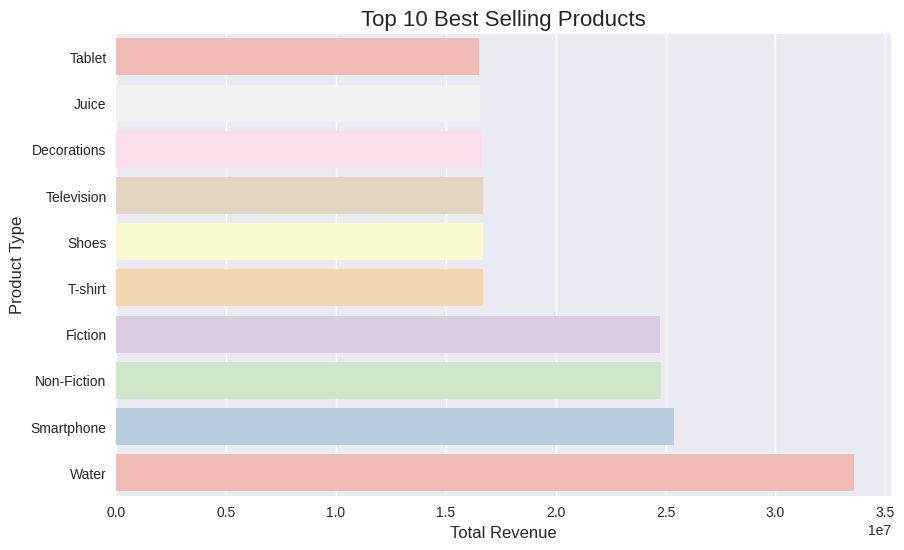

In [41]:
# Top 10 sản phẩm bán chạy nhất
top10_products = df.groupby('Product_Type')['Total_Amount'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_products.values, y=top10_products.index, palette='Pastel1')
plt.title('Top 10 Best Selling Products', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Product Type', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

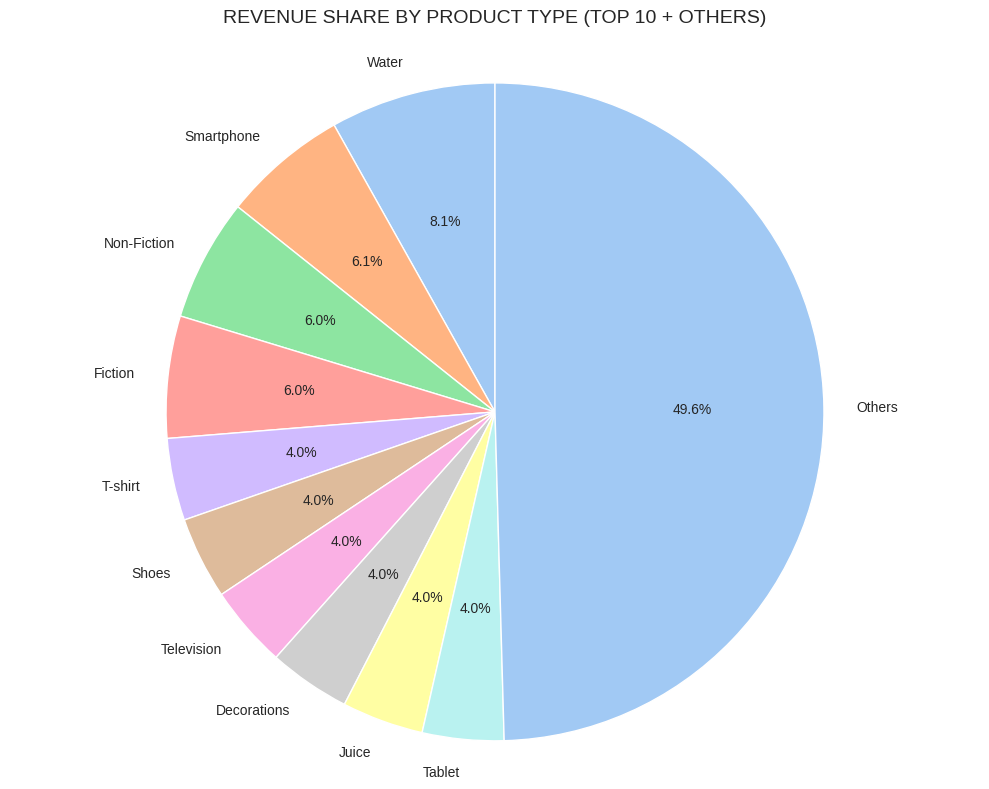

In [42]:
# 1. Tính toán tỷ trọng doanh thu của top 10 sản phẩm
def calculate_revenue_share(dataframe, product_column, revenue_column, top_n=None):

    # Tính tổng doanh thu theo sản phẩm
    revenue_by_product = dataframe.groupby(product_column)[revenue_column].sum().reset_index()
    revenue_by_product = revenue_by_product.sort_values(revenue_column, ascending=False)

    # Tính tỷ lệ phần trăm
    total_revenue = revenue_by_product[revenue_column].sum()
    revenue_by_product['Percentage'] = (revenue_by_product[revenue_column] / total_revenue) * 100

    # Lấy top n sản phẩm nếu được chỉ định
    if top_n is not None:
        others = pd.DataFrame({
            product_column: ['Others'],
            revenue_column: [revenue_by_product[revenue_column][top_n:].sum()],
            'Percentage': [revenue_by_product['Percentage'][top_n:].sum()]
        })
        revenue_by_product = pd.concat([revenue_by_product.head(top_n), others])
    return revenue_by_product
product_revenue = calculate_revenue_share(df, 'Product_Type', 'Total_Amount', top_n=10)

# 2. Trực quan hóa bằng Pie Chart
def visualize_revenue_share(revenue_df, product_column, percentage_column, title):
    colors = sns.color_palette('pastel')
    fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
    wedges, texts, autotexts = ax1.pie(
        revenue_df[percentage_column],
        labels=revenue_df[product_column],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1},
        textprops={'fontsize': 10}
    )

    ax1.set_title(title, pad=20, fontsize=14)
    ax1.axis('equal')

    plt.tight_layout()
    plt.show()

visualize_revenue_share(
    product_revenue,
    'Product_Type',
    'Percentage',
    'REVENUE SHARE BY PRODUCT TYPE (TOP 10 + OTHERS)'
)

Doanh thu theo danh mục sản phẩm cho thấy tháng 3 đạt đỉnh, chủ yếu nhờ sự đóng góp mạnh mẽ từ hai nhóm sản phẩm chính là Electronics và Grocery. Đây là hai nhóm hàng có tính thiết yếu cao và thường xuyên được tiêu dùng, đặc biệt trong giai đoạn đầu năm thời điểm người tiêu dùng có xu hướng mua sắm để khởi đầu mới hoặc nâng cấp thiết bị, vật dụng cá nhân. Điều này mở ra cơ hội lớn cho các chiến dịch marketing và khuyến mãi tập trung vào quý I, tận dụng nhu cầu tự nhiên của thị trường.

Trong khi đó, các danh mục như Books, Clothing và Home Decor duy trì doanh thu ổn định quanh năm, nhưng tỷ trọng đóng góp vẫn khiêm tốn hơn. Mặc dù không tạo đột phá, những nhóm sản phẩm này lại đóng vai trò duy trì dòng doanh thu ổn định và phục vụ các phân khúc khách hàng có thị hiếu đa dạng hơn.

Phân tích top 10 sản phẩm bán chạy cho thấy "Water" và "Smartphone" là hai sản phẩm nổi bật, dẫn đầu về doanh thu. Điều này phản ánh một mặt là nhu cầu tiêu dùng thiết yếu (nước uống), mặt khác là xu hướng đầu tư vào sản phẩm công nghệ cá nhân. Nhóm sản phẩm như Non-Fiction, Shoes và Fiction có mức doanh thu khá đều, cho thấy sự quan tâm đến lối sống, thời trang và sở thích đọc sách

Đáng chú ý, nhóm sản phẩm ngoài top 10 (Others) chiếm tới 49,6% tổng doanh thu, điều này cho thấy doanh nghiệp đang có rất nhiều sản phẩm tiềm năng chưa được khai thác hiệu quả về mặt truyền thông và chiến lược thương mại. Việc không có sản phẩm vượt trội ngoài một vài cái tên như Smartphone cũng cho thấy thị trường hiện tại đang phân tán và mở ra cơ hội hơn.

**Khuyến nghị chiến lược:**

* Ưu tiên danh mục: Tăng cường đầu tư vào Electronics, Grocery và các sản phẩm công nghệ tiềm năng những nhóm đã chứng minh khả năng tạo doanh thu vượt trội.

* Đa dạng hóa sản phẩm: Tiến hành đánh giá định kỳ hiệu suất sản phẩm, cải tiến hoặc loại bỏ các mặt hàng có doanh thu thấp, đồng thời xem xét các sản phẩm nằm trong nhóm "Others" để tìm kiếm các cơ hội tăng trưởng ẩn.

* Tối ưu thời điểm bán hàng: Đẩy mạnh hoạt động kinh doanh trong quý I, đặc biệt là tháng 3, kết hợp với các chương trình khuyến mãi theo mùa trong những giai đoạn còn lại để duy trì doanh thu ổn định và tránh sự phụ thuộc vào thời điểm cao điểm duy nhất.

## Phân phối doanh thu theo quốc gia/khu vực

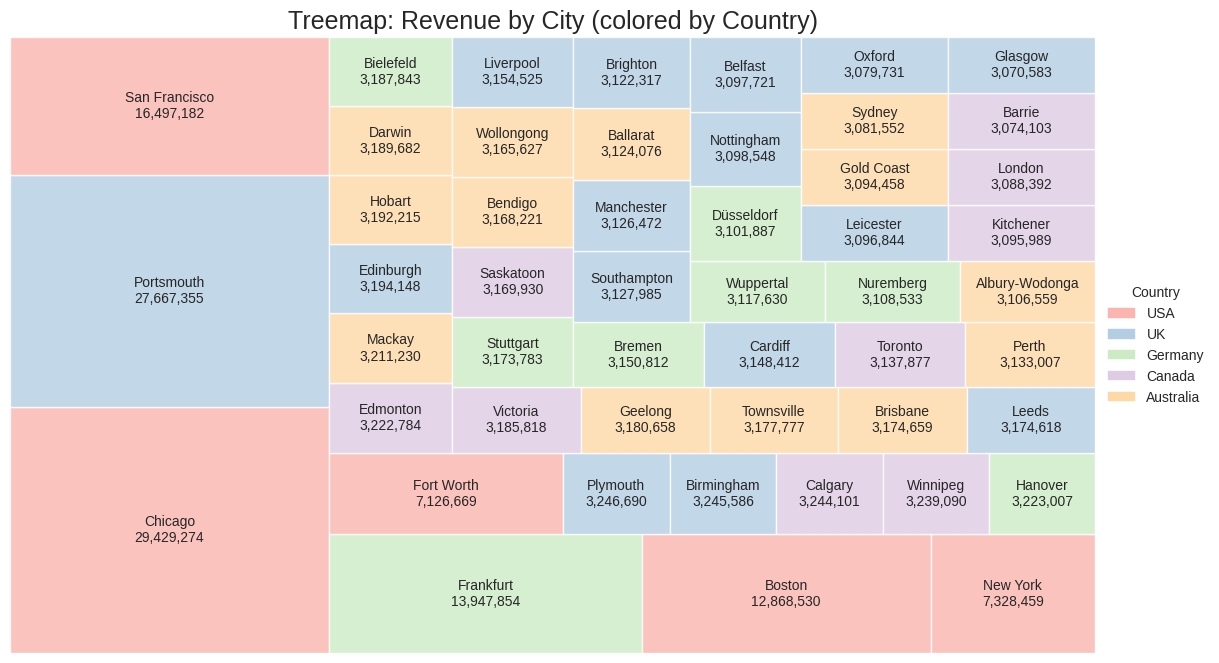

In [43]:
# 1. Tính tổng và top n
data = (
    df
    .groupby(['Country','City'])['Total_Amount']
    .sum()
    .reset_index()
)
top_cities = data.sort_values('Total_Amount', ascending=False).head(50)

# 2. Chuẩn bị màu cho từng Country
countries = top_cities['Country'].unique()
palette = sns.color_palette('Pastel1', len(countries))
country_to_color = dict(zip(countries, palette))

# Ánh xạ màu theo country
colors = top_cities['Country'].map(country_to_color)

# 3. Chuẩn bị label chỉ gồm City + doanh thu
labels = top_cities.apply(
    lambda r: f"{r.City}\n{r.Total_Amount:,.0f}", axis=1
)

# 4. Vẽ treemap
plt.figure(figsize=(14, 8))
squarify.plot(
    sizes=top_cities['Total_Amount'],
    label=labels,
    color=colors,
    alpha=0.8,
    edgecolor='white',
    linewidth=1
)
plt.axis('off')
plt.title('Treemap: Revenue by City (colored by Country)', fontsize=18)

# 5. Thêm legend (không ghi tiêu đề “Country” trong legend box)
handles = [
    plt.Rectangle((0,0),1,1, color=country_to_color[c])
    for c in countries
]
plt.legend(
    handles,
    countries,
    title='Country',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

Phân tích dữ liệu bán lẻ cho thấy doanh thu phân bổ không đồng đều giữa các thành phố trên toàn cầu, với sự chênh lệch rõ rệt về mức độ đóng góp giữa các khu vực địa lý.

Các thành phố thuộc Hoa Kỳ chiếm ưu thế vượt trội về doanh thu, trong khi các thành phố tại châu Âu và Úc duy trì mức doanh thu ổn định nhưng thiếu sự nổi bật. Điều này phản ánh sự khác biệt về tiềm năng thị trường và hiệu quả hoạt động kinh doanh giữa các khu vực.

Việc tập trung doanh thu tại các thành phố trọng điểm, đồng thời duy trì sự hiện diện rộng rãi ở nhiều thành phố quy mô nhỏ, cho thấy chiến lược phân bổ thị trường tương đối hiệu quả và giúp giảm thiểu rủi ro phụ thuộc vào một khu vực duy nhất. Tuy nhiên, khoảng cách đáng kể giữa nhóm thành phố dẫn đầu và phần còn lại cũng cho thấy tiềm năng khai thác vẫn chưa được tận dụng triệt để. Đáng chú ý, sự hiện diện còn mờ nhạt tại các thủ đô lớn như London hay Berlin có thể là một cơ hội thị trường đang bị bỏ lỡ.

Mặc dù một số thành phố đang tạo ra mức doanh thu vượt trội, phần lớn các địa phương còn lại có doanh thu ở mức ổn định. Điều này mở ra cơ hội rõ ràng cho doanh nghiệp đầu tư thêm nhằm khai thác hiệu quả hơn tại những thị trường chưa phát huy hết tiềm năng.


#Phân tích giỏ hàng

In [44]:
# Sử dụng df tạm để tránh việc sửa đổi df_cleaned
df_ba = df_cleaned.copy()

In [45]:
#Bỏ các dòng có TransactionId là null
df_ba = df_ba[df_ba['Transaction_ID'].notna()]

- Không thể phân tích giỏ hàng nếu không có ID giao dịch

In [46]:
df_ba

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Country,Age,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,Products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,Germany,21.0,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,UK,19.0,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,Australia,48.0,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,Canada,56.0,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,UK,22.0,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,Australia,31.0,...,973.962985,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,Germany,35.0,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,UK,41.0,...,182.105284,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,Canada,41.0,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


In [47]:
# Tạo bảng basket cho giỏ hàng
basket = df.groupby(['Transaction_ID', 'Products'])['Products'].count().unstack().fillna(0)
basket = (basket > 0).astype(int)

In [48]:
print(basket.shape)
print(basket.sum().sort_values(ascending=False).head(10))  # Top sản phẩm xuất hiện nhiều nhất
print(basket.sum(axis=1).value_counts())  # Số sản phẩm/giỏ hàng

(294284, 318)
Products
Spring water       2501
Bottled water      2489
Mystery            2487
Distilled water    2470
Artesian water     2463
Alkaline water     2440
Adventure          2435
Mineral water      2423
Coconut water      2422
Flavored water     2421
dtype: int64
1    287415
2      6754
3       114
4         1
Name: count, dtype: int64


- Có 294284 giỏ hàng và 318 sản phẩm
- Nhưng:
  *  287415 giỏ chỉ có 1 sản phẩm  
  * 6754 giỏ có 2 sản phẩm  
  * 114 giỏ có 3 sản phẩm  
  * 1 giỏ có 4 sản phẩm
- Có đến 287415 giỏ chỉ có 1 sản phẩm chiếm đến gần 98% nên ta chỉ lấy các giỏ từ 2 sản phẩm trở lên
- Các sản phẩm phổ biến nhất chỉ xuất hiện khoảng 2,400 – 2,500 lần (~0.86% tổng giao dịch).
- Nếu ban đầu chọn min_support=0.01 (1%) là ~2,900 lần. Nhưng sản phẩm nhiều nhất chỉ xuất hiện ~2,500 lần, mà giỏ hàng có ≥2 sản phẩm chỉ là 6,800 giỏ.
- Đa số giao dịch chỉ mua 1 sản phẩm → hầu như không có cặp sản phẩm nào được mua cùng nhau đủ lớn.
=> Vậy ta sẽ chọn min_support = 0.001 (0.1%)

In [49]:
basket_multi = basket[basket.sum(axis=1) > 1]
print(basket_multi.shape)

(6869, 318)


In [50]:
from mlxtend.frequent_patterns import apriori, association_rules
# Chọn min_support=0.001
frequent_itemsets = apriori(basket_multi, min_support=0.001, use_colnames=True)
#Tạo ra các luật
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


         antecedents       consequents   support  confidence       lift
0          (Oxfords)           (Boots)  0.001165    0.111111  12.114638
1            (Boots)         (Oxfords)  0.001165    0.126984  12.114638
2         (Sneakers)           (Boots)  0.001019    0.145833  15.900463
3            (Boots)        (Sneakers)  0.001019    0.111111  15.900463
4    (Coconut water)  (Flavored water)  0.001019    0.066038   3.877036
5   (Flavored water)   (Coconut water)  0.001019    0.059829   3.877036
6     (Energy drink)            (Cola)  0.001019    0.095890  10.455099
7             (Cola)    (Energy drink)  0.001019    0.111111  10.455099
8          (Cooking)         (Science)  0.001456    0.107527   7.693772
9          (Science)         (Cooking)  0.001456    0.104167   7.693772
10            (LG G)    (Google Pixel)  0.001019    0.086420   5.996134
11    (Google Pixel)            (LG G)  0.001019    0.070707   5.996134
12     (Sony Xperia)       (Xiaomi Mi)  0.001019    0.069307   5

1. Các sản phẩm giày (**Boots, Oxfords, Sneakers**) có mối liên hệ mua kèm cực kỳ mạnh
  - **Boots** và **Oxfords** thường được mua cùng nhau, với:
  - Lift = 12.11: Khi mua Boots, khả năng mua thêm **Oxfords** cao gấp 12 lần so với ngẫu nhiên.

    - Confidence ≈ 12.7%: Cứ 100 khách mua Boots thì có ~13 khách mua thêm **Oxfords.**

  - **Boots** và **Sneakers** cũng có lift = 15.9: Cực kỳ mạnh! Những khách mua **Boots** rất hay mua thêm **Sneakers**, và ngược lại.

  → Đề xuất:

  - Triển khai combo **Boots** & **Oxfords**, **Boots** & **Sneakers** hoặc chương trình giảm giá khi mua hai sản phẩm này cùng lúc.

  - Cross-sell/Up-sell khi khách chọn 1 sản phẩm sẽ gợi ý thêm sản phẩm kia.

2. Đồ uống có liên hệ mua kèm
  - **Coconut water** và **Flavored water**:

    - Lift ≈ 3.88: Khi khách mua 1 loại, xác suất mua loại còn lại tăng gần 4 lần so với ngẫu nhiên.

  - **Cola** và **Energy drink** cũng có lift cao (~10.5), cho thấy khách thường mua nước giải khát đa dạng trong 1 lần mua sắm.

  → Đề xuất: Bán kèm combo các loại nước này, đặt gần nhau tại điểm bán hàng, hoặc tạo chương trình ưu đãi nhóm nước uống.

3. Sản phẩm công nghệ thường mua kèm nhau
  - **Sony Xperia, Xiaomi Mi, iPhone, LG G, Google Pixel** thường xuất hiện cùng nhau trong các giỏ hàng.

  - Các lift đều trên 5, có nghĩa là khả năng khách mua nhiều loại smartphone trong cùng một giao dịch cao hơn nhiều so với ngẫu nhiên.

  → Đề xuất: Đặt các sản phẩm công nghệ cạnh nhau trong cửa hàng/trang web, có thể tạo gói phụ kiện chung cho các dòng smartphone.

# Phân khúc khách hàng
- Tiếp tục sử dụng lại df_cleaned được copy từ df đã được làm sạch.
- Bước 1: Tiền xử lý thêm (chuẩn hóa dữ liệu số và rút gọn) Chọn các đặc trưng liên quan đến hành vi mua hàng để phân cụm

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_3 = df_cleaned.copy()
# Lọc các cột cần thiết để phân khúc
df_seg = df_3[['Customer_ID', 'Total_Purchases', 'Total_Amount', 'Ratings']].copy()

# Loại bỏ giá trị thiếu nếu có
df_seg.dropna(inplace=True)

# Nhóm theo khách hàng vì mỗi khách hàng có thể có nhiều dòng (nhiều đơn hàng)
df_grouped = df_seg.groupby('Customer_ID').agg({
    'Total_Purchases': 'sum',
    'Total_Amount': 'sum',
    'Ratings': 'mean'
}).reset_index()


- BƯỚC 2: Chuẩn hóa dữ liệu (Standardization)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_grouped[['Total_Purchases', 'Total_Amount', 'Ratings']])


- BƯỚC 3: Tìm cụm K bằng phương pháp ELBOW

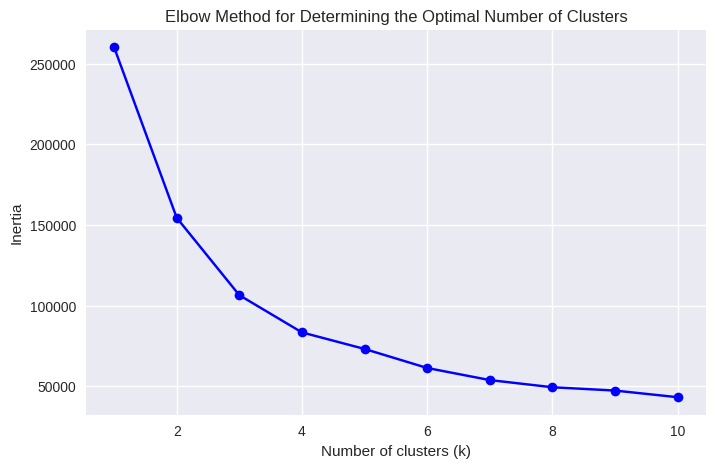

In [53]:

# Tìm số cụm tối ưu bằng phương pháp Elbow
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining the Optimal Number of Clusters')
plt.grid(True)
plt.show()

**Kết luận từ biểu đồ Elbow**
Biểu đồ Elbow cho thấy rằng tổng bình phương sai số trong cụm (Inertia) giảm nhanh khi tăng số cụm từ k = 1 đến k = 3, sau đó bắt đầu giảm chậm dần. Điều này cho thấy "khuỷu tay" (elbow) xuất hiện rõ ở k = 3 hoặc k = 4.
-> Vì vậy, số cụm tối ưu cho mô hình KMeans nên chọn là 3 hoặc 4:
- k = 3 phù hợp nếu cần phân khúc đơn giản (ví dụ: khách hàng tốt – trung bình – kém).

- k = 4 phù hợp nếu muốn phân khúc chi tiết hơn (ví dụ: thêm nhóm khách hàng tiềm năng hoặc VIP).
 Ở đây sẽ áp dụng cụm 4 để phân khúc chi tiết khách hàng

- BƯỚC 4: Áp dụng KMeans để phân cụm khách hàng

In [54]:
from sklearn.cluster import KMeans
# Chọn số cụm (ví dụ: 4 phân khúc khách hàng)
kmeans = KMeans(n_clusters=4, random_state=42)
df_grouped['Segment'] = kmeans.fit_predict(X_scaled)
# Gán nhanx phân khúc df_3
# Gộp thông tin phân khúc vào df_3 theo Customer_ID
df_3 = df_3.merge(df_grouped[['Customer_ID', 'Segment']], on='Customer_ID', how='left')
# Thống kê theo từng phân khúc
df_3.groupby('Segment')[['Total_Purchases', 'Total_Amount', 'Ratings']].mean()


,Total_Purchases,Total_Amount,Ratings
Segment,,,
0.0,4.634335,1078.616799,2.364730
1.0,5.519335,1408.766673,3.174988
2.0,4.599764,1065.916828,3.958654
3.0,6.163149,1724.724685,3.154289


- BƯỚC 5: Trực quan

/tmp/ipython-input-2804970773.py:28: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2804970773.py:28: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2804970773.py:28: UserWarning: Glyph 7893 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-2804970773.py:28: UserWarning: Glyph 7875 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND HOOK ABOVE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7889 (\N{LATIN SMALL LETTER O WITH CIRCUMFLEX AND ACUTE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:15

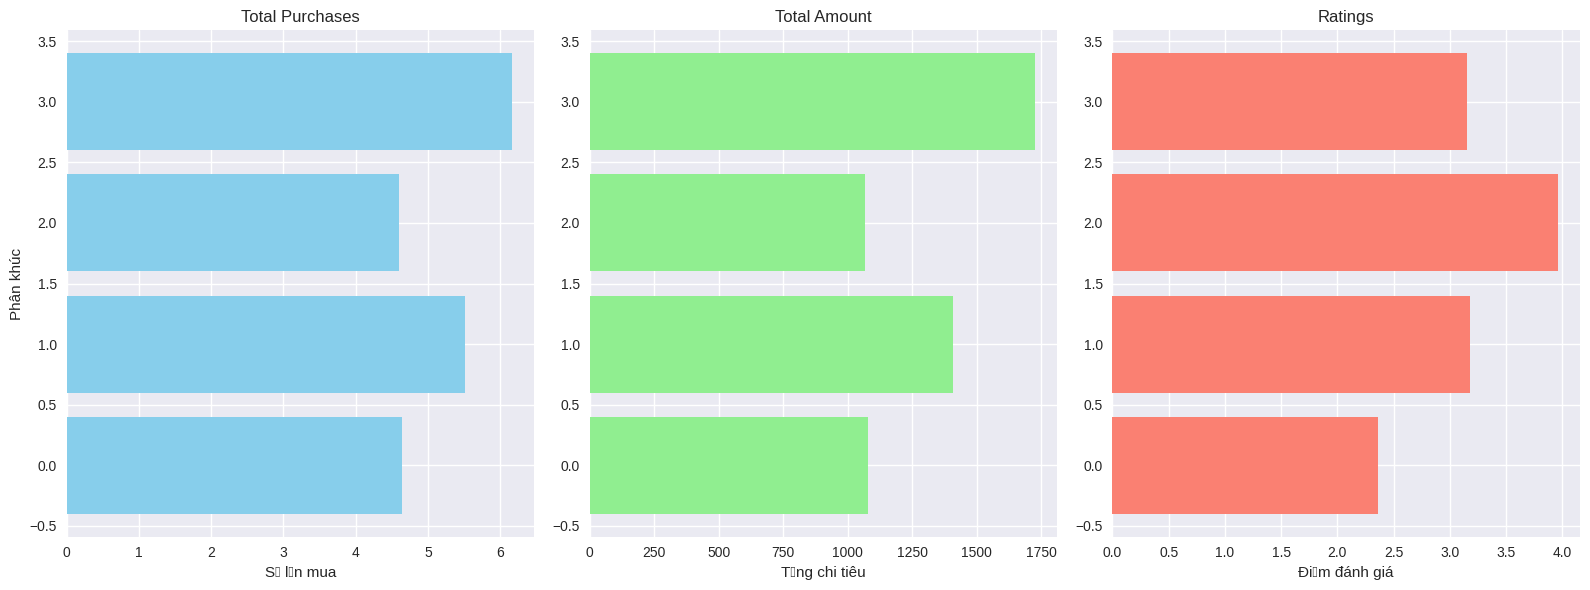

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Tính trung bình các chỉ số theo từng phân khúc
summary_df = df_3.groupby('Segment')[['Total_Purchases', 'Total_Amount', 'Ratings']].mean().reset_index()

# Tạo biểu đồ ngang với 3 subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

# Biểu đồ Total_Purchases
axes[0].barh(summary_df['Segment'], summary_df['Total_Purchases'], color='skyblue')
axes[0].set_title('Total Purchases')
axes[0].set_xlabel('Số lần mua')
axes[0].set_ylabel('Phân khúc')

# Biểu đồ Total_Amount
axes[1].barh(summary_df['Segment'], summary_df['Total_Amount'], color='lightgreen')
axes[1].set_title('Total Amount')
axes[1].set_xlabel('Tổng chi tiêu')
axes[1].set_ylabel('')

# Biểu đồ Ratings
axes[2].barh(summary_df['Segment'], summary_df['Ratings'], color='salmon')
axes[2].set_title('Ratings')
axes[2].set_xlabel('Điểm đánh giá')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()


## Báo cáo phân tích 4 cụm
1. Mục tiêu
Phân tích và chia khách hàng thành các nhóm (segment) dựa trên 3 yếu tố hành vi:

- Số lần mua hàng (Total_Purchases)

- Tổng số tiền đã chi tiêu (Total_Amount)

- Đánh giá của khách hàng (Ratings)

2. Kết quả phân cụm
Sau khi áp dụng phương pháp phân cụm KMeans, dữ liệu khách hàng được chia thành 4 nhóm chính. Bảng dưới đây thể hiện giá trị trung bình của từng đặc điểm trong mỗi phân khúc:

*Tổng kết phân tích phân khúc khách hàng*

| Phân khúc | Số lần mua trung bình | Tổng chi tiêu trung bình | Điểm đánh giá trung bình | Đặc điểm                                                                 |
|---------------------|------------------------|----------------------------|---------------------------|--------------------------------------------------------------------------|
| **0**               | 5.52                   | 1,409.46                   | 3.17                      | Chi tiêu cao, đánh giá trung bình, số lần mua tương đối cao              |
| **1**               | 4.61                   | 1,067.95                   | 3.96                      | Đánh giá cao nhất, chi tiêu và số lần mua đều thấp                       |
| **2**               | 4.63                   | 1,076.43                   | 2.36                      | Đánh giá thấp nhất, chi tiêu và số lần mua đều ở mức thấp                |
| **3**               | 6.16                   | 1,724.44                   | 3.16                      | Khách hàng trung thành, chi tiêu cao nhất, số lần mua nhiều, đánh giá ổn |

### Kết luận

Dựa trên kết quả phân cụm, có thể rút ra một số nhận định chính:

- **Phân khúc 3** là nhóm khách hàng tiềm năng nhất với mức chi tiêu và số lần mua cao nhất. Đây là nhóm cần được ưu tiên chăm sóc và giữ chân.
- **Phân khúc 0** cũng là một nhóm có giá trị với mức chi tiêu cao và hành vi mua hàng ổn định, tuy đánh giá không quá nổi bật.
- **Phân khúc 1** tuy có đánh giá tốt nhất, nhưng tần suất mua và chi tiêu thấp. Có thể là nhóm khách hàng mới hoặc thận trọng — cần chiến lược kích thích mua hàng.
- **Phân khúc 2** là nhóm có giá trị thấp nhất cả về đánh giá lẫn hành vi chi tiêu và mua sắm. Cần xem xét nguyên nhân để cải thiện trải nghiệm hoặc chuyển hướng nguồn lực sang nhóm khách hàng khác.

# Tối ưu hoá tồn kho

In [56]:
# df_cleaned = pd.read_csv('/content/drive/MyDrive/SIC/Data/new_retail_data.csv')

# # Sửa lỗi chuyển đổi ngày bằng cách bỏ qua giá trị không hợp lệ
# df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


# Tính toán nhu cầu trung bình mỗi ngày
# Gom nhóm theo loại sản phẩm và ngày để tính tổng số lượt mua mỗi ngày
daily_demand = df_cleaned.groupby(['Product_Type', 'Date'])['Total_Purchases'].sum().reset_index()

# Tính trung bình và độ lệch chuẩn nhu cầu theo từng loại sản phẩm
demand_stats = daily_demand.groupby('Product_Type')['Total_Purchases'].agg(['mean', 'std']).reset_index()
demand_stats.rename(columns={
    'mean': 'Nhu_cau_trung_binh_moi_ngay',
    'std': 'Do_lech_chuan'
}, inplace=True)

# Tính toán safety stock (tồn kho an toàn) và reorder point.
# Thông số giả định
lead_time = 7  # thời gian giao hàng: 7 ngày
Z = 1.65       # mức độ tin cậy 95%

# Tính tồn kho an toàn
demand_stats['Ton_kho_an_toan'] = Z * demand_stats['Do_lech_chuan'] * np.sqrt(lead_time)

# Tính điểm đặt hàng lại
demand_stats['Reorder point'] = demand_stats['Nhu_cau_trung_binh_moi_ngay'] * lead_time + demand_stats['Ton_kho_an_toan']

# Hiển thị bảng kết quả
display(demand_stats)


,Product_Type,Nhu_cau_trung_binh_moi_ngay,Do_lech_chuan,Ton_kho_an_toan,Reorder point
0,Bathroom,88.316076,23.653425,103.258783,721.471317
1,Bedding,87.068120,24.975359,109.029673,718.506512
2,BlueStar AC,32.836066,14.500653,63.302452,293.154911
3,Children's,88.550409,25.307660,110.480327,730.333188
4,Chocolate,88.487738,26.434665,115.400257,734.814426
5,Coffee,90.046322,25.970150,113.372419,743.696670
6,Decorations,177.144414,35.318742,154.183602,1394.194501
7,Dress,89.599455,26.796140,116.978272,744.174457
8,Fiction,263.978202,41.281250,180.212870,2028.060282
9,Fridge,109.307902,27.076708,118.203088,883.358401


## Trực quan hóa

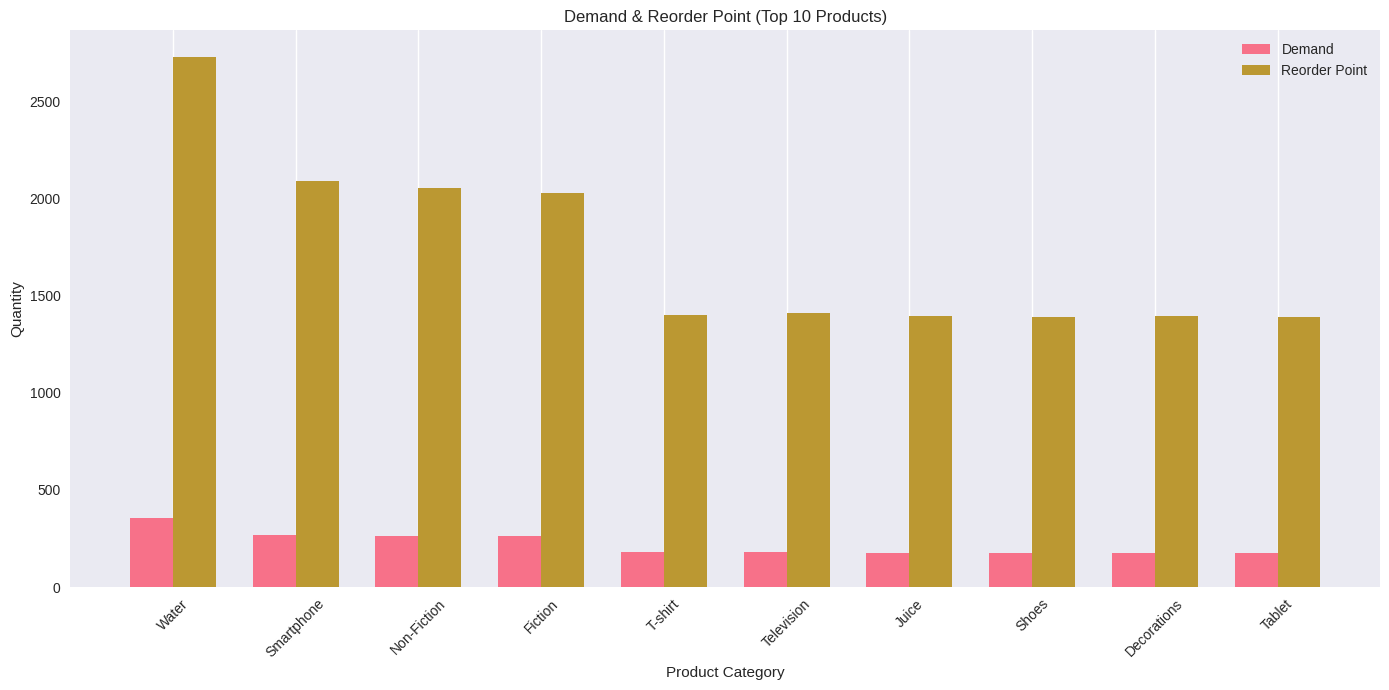

In [57]:
#df_cleaned = pd.read_csv('/content/drive/MyDrive/SIC/Data/new_retail_data.csv')
#df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Tính nhu cầu trung bình mỗi ngày
daily_demand = df_cleaned.groupby(['Product_Type', 'Date'])['Total_Purchases'].sum().reset_index()
demand_stats = daily_demand.groupby('Product_Type')['Total_Purchases'].agg(['mean', 'std']).reset_index()
demand_stats.rename(columns={
    'mean': 'Nhu_cau_trung_binh_moi_ngay',
    'std': 'Do_lech_chuan'
}, inplace=True)

# Tính tồn kho an toàn và Reorder Point
lead_time = 7
Z = 1.65
demand_stats['Ton_kho_an_toan'] = Z * demand_stats['Do_lech_chuan'] * np.sqrt(lead_time)
demand_stats['Reorder point'] = demand_stats['Nhu_cau_trung_binh_moi_ngay'] * lead_time + demand_stats['Ton_kho_an_toan']

# Vẽ biểu đồ trực quan với Top 10 sản phẩm theo nhu cầu
top_demand = demand_stats.sort_values(by='Nhu_cau_trung_binh_moi_ngay', ascending=False).head(10)

# Thiết lập biểu đồ
plt.figure(figsize=(14, 7))
bar_width = 0.35
x = range(len(top_demand))

# Vẽ nhu cầu trung bình và điểm đặt hàng lại
plt.bar(x, top_demand['Nhu_cau_trung_binh_moi_ngay'], width=bar_width, label='Demand')
plt.bar([p + bar_width for p in x], top_demand['Reorder point'], width=bar_width, label='Reorder Point')

# Gán nhãn và định dạng
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.title('Demand & Reorder Point (Top 10 Products)')
plt.xticks([p + bar_width / 2 for p in x], top_demand['Product_Type'], rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y')
plt.show()


# Dự báo doanh thu bằng mô hình Prophet

In [58]:
# Sử dụng df tạm để tránh việc sửa đổi df_cleaned
df_model = df_cleaned.copy()

In [59]:
#Hàm tính doanh thu theo ngày
def calculate_daily_revenue(df_model):
    df_filtered = df_model[df_model['Date'] != 'Unknown'].copy()
    df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
    daily_revenue = df_filtered.resample('D', on='Date')['Total_Amount'].sum().reset_index()
    daily_revenue['Date'] = daily_revenue['Date'].dt.strftime('%Y-%m-%d')
    return daily_revenue[['Date', 'Total_Amount']]

In [60]:
# Lưu bảng vào file CSV trong Google Drive
revenue_daily = calculate_daily_revenue(df_model)
revenue_daily.to_csv('/content/drive/MyDrive/SIC/Data/daily_revenue.csv', index=False)

In [61]:
#Chuẩn bị dữ liệu
df_model = pd.read_csv('/content/drive/MyDrive/SIC/Data/daily_revenue.csv')
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          366 non-null    object 
 1   Total_Amount  366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [62]:
from prophet import Prophet
# Đổi tên cột theo mô hình Prophet
df_model = df_model.rename(columns={'Date': 'ds', 'Total_Amount': 'y'})


<Axes: >

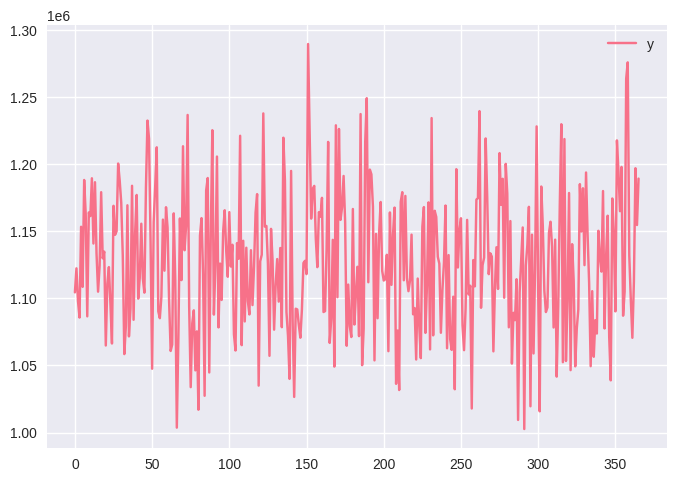

In [63]:
df_model.plot()

In [64]:
#Khởi tạo mô hình
my_model = Prophet(interval_width=0.95)
my_model.fit(df_model)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsxxo0hco/8i548_k6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsxxo0hco/4qwmyv9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=230', 'data', 'file=/tmp/tmpsxxo0hco/8i548_k6.json', 'init=/tmp/tmpsxxo0hco/4qwmyv9y.json', 'output', 'file=/tmp/tmpsxxo0hco/prophet_model2y0cswre/prophet_model-20250806131615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:16:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:16:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
# Tạo dataframe cho dự báo (90 ngày tiếp theo)
future = my_model.make_future_dataframe(periods=90, freq='D')
forecast = my_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
451,2024-05-25,1.134695e+06,1.027837e+06,1.238722e+06
452,2024-05-26,1.133566e+06,1.028913e+06,1.233799e+06
453,2024-05-27,1.132724e+06,1.033649e+06,1.231327e+06
454,2024-05-28,1.134582e+06,1.037072e+06,1.238902e+06
455,2024-05-29,1.131524e+06,1.027266e+06,1.231523e+06


yhat : giá trị dự báo của chỉ số

yhat_lower : giới hạn dưới của dự báo

yhat_upper : giới hạn trên của dự báo

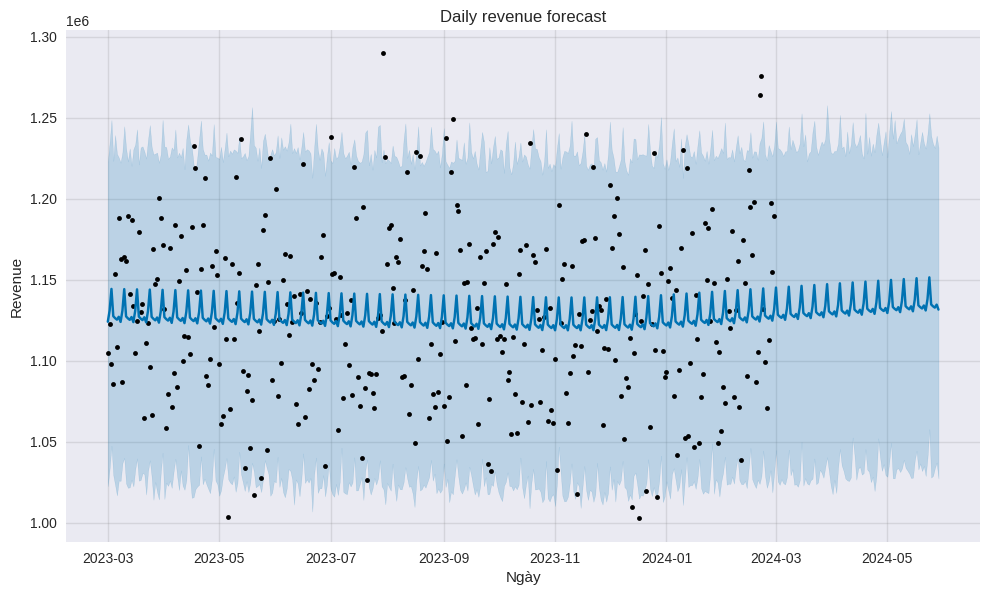

In [66]:
# Trực quan hóa kết quả
fig1 = my_model.plot(forecast)
plt.title('Daily revenue forecast')
plt.xlabel('Ngày')
plt.ylabel('Revenue')
plt.show()

In [67]:
# Tính độ rộng trung bình của khoảng dự báo (theo %)
forecast['uncertainty_pct'] = (forecast['yhat_upper'] - forecast['yhat_lower']) / forecast['yhat'] * 100
avg_uncertainty = forecast['uncertainty_pct'].mean()

print(f"Khoảng dự báo trung bình rộng {avg_uncertainty:.2f}% so với giá trị trung tâm")

Khoảng dự báo trung bình rộng 18.09% so với giá trị trung tâm


Khoảng dự báo trung bình rộng 18.07% phù hợp dự báo trung hạn (3-6 tháng)

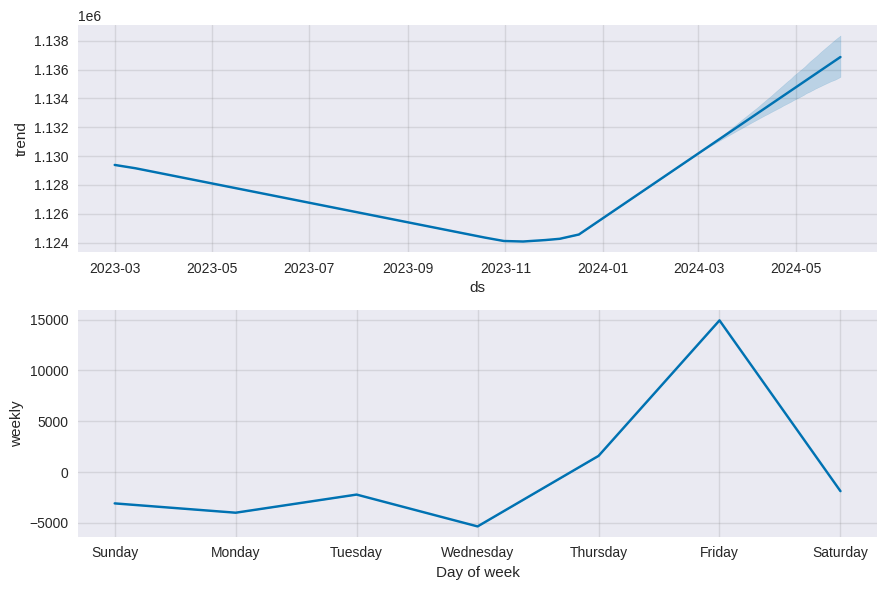

In [68]:
fig2 = my_model.plot_components(forecast)
plt.show()

In [69]:
# Đánh giá mô hình
# Lấy phần dữ liệu có giá trị thực để đánh giá
from sklearn.metrics import mean_absolute_error, mean_squared_error
train_eval = forecast[forecast['ds'].isin(df_model['ds'])]

#  Tính MAE, RMSE, MAPE
mae = mean_absolute_error(df_model['y'], train_eval['yhat'])
rmse = np.sqrt(mean_squared_error(df_model['y'], train_eval['yhat']))
mape = np.mean(np.abs((df_model['y'] - train_eval['yhat']) / df_model['y'])) * 100

print("\n=== Đánh giá Mô hình ===")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


=== Đánh giá Mô hình ===
MAE: 42544.29
RMSE: 52324.86
MAPE: 3.78%


/tmp/ipython-input-4144994956.py:4: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  train_eval = forecast[forecast['ds'].isin(df_model['ds'])]
